In [1]:
from common_code.common import *
from common_code.plotting import *

from Trainers.DatasetQA import *
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from random import shuffle

In [5]:


base = './experiments/GLUE/'

dataset = 'qqp'
if dataset not in os.listdir(base):
    os.mkdir(base+dataset)

base_dir1 = base+dataset+'_diversity_lstm_tanh/'+dataset.upper()+'/diversity_lstm+tanh__diversity_weight_0'
base_dir2 = base+dataset+'_ortho_lstm_tanh/'+dataset.upper()+'/ortho_lstm+tanh'
base_dir3 = base+dataset+'_diversity_lstm_tanh/'+dataset.upper()+'/diversity_lstm+tanh__diversity_weight_0.5'
       
path_to_png_1 = base + dataset +'/attn_pngs_1_{}/'.format(dataset)
path_to_png_0 = base + dataset +'/attn_pngs_0_{}/'.format(dataset)
path_to_csv_1 = base + dataset +'/form_data_1_{}.tsv'.format(dataset)
path_to_csv_0 = base + dataset +'/form_data_0_{}.tsv'.format(dataset)


if 'attn_pngs_0_{}'.format(dataset) not in os.listdir(base+dataset):
    os.mkdir(path_to_png_0)
if 'attn_pngs_1_{}'.format(dataset) not in os.listdir(base+dataset):
    os.mkdir(path_to_png_1)



In [6]:
dataset = datasets[dataset]()

def process_grads(grads, X) :
    for k in grads :
        if (k != "conicity") and (k != "X"):
            xxe = grads[k]
            for i in range(len(xxe)) :
                L = len(X[i])
                xxe[i] = np.abs(xxe[i])
                xxe[i] = xxe[i] / np.sum(xxe[i][1:L-1])

def get_outputs(base_dir):    
    dirname = get_latest_model(base_dir)
    outputs = pload1(dirname,'test_output')
#     outputs['cd_attn'] = pload1(dirname,'cd')
#     outputs['cd_matrix'] = pload1(dirname,'cd_matrix')
#     pred = np.argmax(outputs['yt_hat'],axis=1).squeeze()
#     yt_pred= np.zeros_like(prob)
#     yt_pred[prob>0.5] = 1
#     outputs['yt_pred'] = pred
    return outputs

//anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [7]:
def print_attention(output1, output2, output3, output_filter=0, plot=True, jsd_thresh=0.3, max=10, crop=True):
    
    # output_filter = 0 => question are paraphrased/identical
    
    op = output_filter
    
    if(output_filter == 1):
        path_to_png = path_to_png_1
        path_to_csv = path_to_csv_1
    else:
        path_to_png = path_to_png_0
        path_to_csv = path_to_csv_0

    # shuffles outputs
#     shuffle_in_unison(output1)
#     shuffle_in_unison(output2


    fi = open(path_to_csv, 'w')
    count = 0
    
    for idx in range(len(output1['attn_hat'])):
        
        attn1 = output1['attn_hat'][idx]
        attn2 = output2['attn_hat'][idx]
        attn3 = output3['attn_hat'][idx]
        
        L = len(output1['P'][idx])
        js_divergence = jsd(attn1[1:L-1],attn3[1:L-1])

        if (js_divergence >= jsd_thresh):
            
            y_pred1 = output1['yt_hat'][idx]
            y_pred2 = output2['yt_hat'][idx]
            y_pred3 = output3['yt_hat'][idx]
            
            y = output1['y'][idx]

            sentence = dataset.vec.map2words(output1['P'][idx])  
            question = dataset.vec.map2words(output1['Q'][idx])  
            
            l_q = len(question)
            question = " ".join(question[1:l_q-1])

            L = len(sentence)
            
            if ( y == op and y == y_pred1 and y== y_pred3):
            
                if( max != -1 and count == max):
                    break
                    
                count += 1
            
                if(plot):
                    # write to file

                    fi.write(str(y)+'\t')
                    fi.write(question+'\n')

                    #plot figures
                    png_path = path_to_png + "example{}.png".format(count)
                    
                    print(question)
                    print(L)

                    print_attn(sentence[1:L-1], attn1[1:L-1])
                    print_attn(sentence[1:L-1], attn3[1:L-1])

                    if(len(sentence[1:L-1]) <= 12):
                        kws = {"rotation": 0, "size": 10}
                    else:
                        kws = {"rotation": 45, "size": 15}

                    fig, ax = init_gridspec(10, 1, 2)
                    attn_matirx = np.array(attn1[1:L-1]).reshape(1,-1)
                    annotate = np.array(sentence[1:L-1]).reshape(1,-1)
                    ax[0].set_ylabel('')    
                    ax[0].set_xlabel('')

                    ax[0] = plot_attention(ax[0], attn_matirx, annotate, kws)

                    attn_matirx = np.array(attn3[1:L-1]).reshape(1,-1)
                    annotate = np.array(sentence[1:L-1]).reshape(1,-1)
                    ax[1] = plot_attention(ax[1], attn_matirx, annotate, kws)

                    show_gridspec()
                    fig.savefig(png_path)
                    
                    print ("-"*30)
                    sys.stdout.flush()
                    
                    
    if(plot and crop):
        #crop pngs to remove whitespace
        print("Cropping saved pngs")

        for l in os.listdir(path_to_png):
            if(l == '.DS_Store'):
                continue
            crop_img(path_to_png+l)

        print("Done cropping")
            
    return count

In [8]:
output1 = get_outputs(base_dir1)
output2 = get_outputs(base_dir1)
output3 = get_outputs(base_dir3)






In [38]:
count = print_attention(output1,output2, output3, max=250, plot=True, output_filter=1, jsd_thresh=0.21)
print(count)

250


What is it like to work at Google ?
3


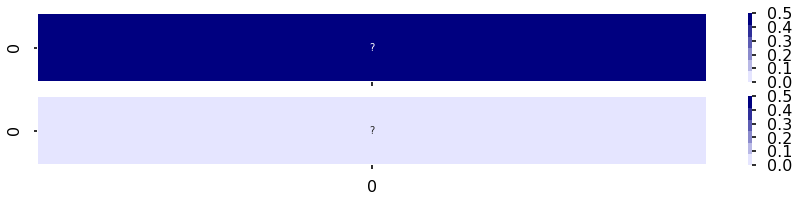

------------------------------
Why is unemployment bad ?
6


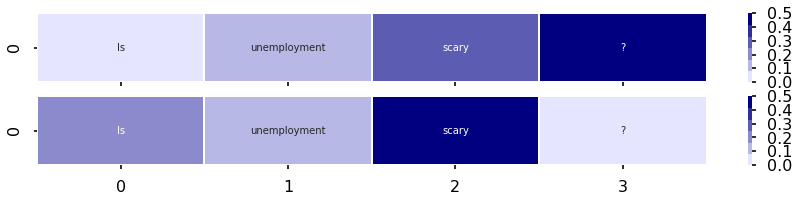

------------------------------
What is <UNK> ?
6


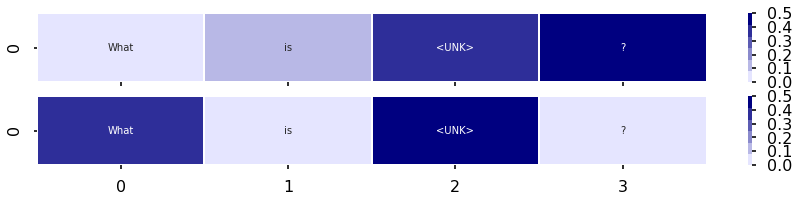

------------------------------
What is colonial rule ?
6


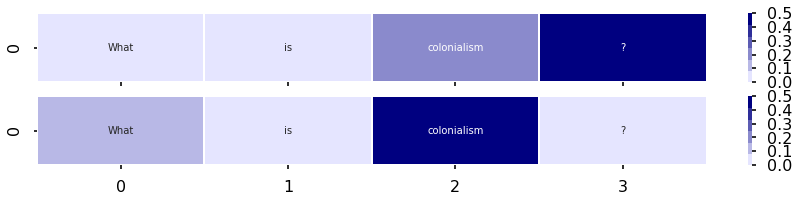

------------------------------
What is the full form of ASAP ?
6


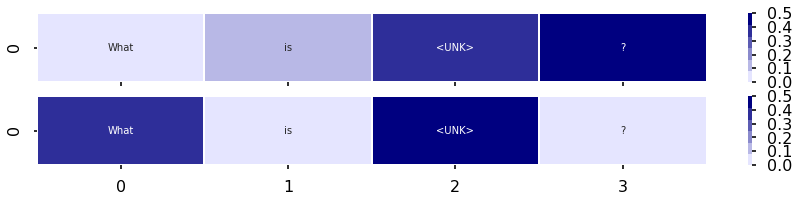

------------------------------
What is refrigeration ?
6


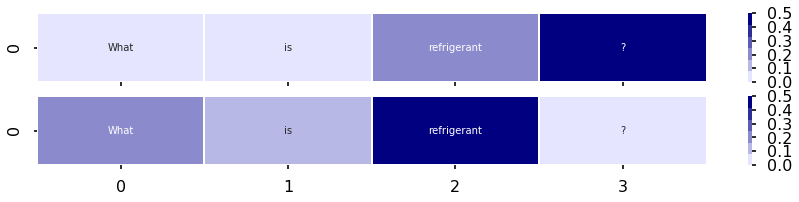

------------------------------
How can I track a WeChat chat ?
6


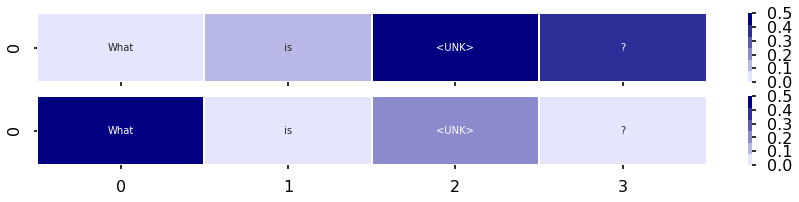

------------------------------
What are some urban legends in Italy ?
6


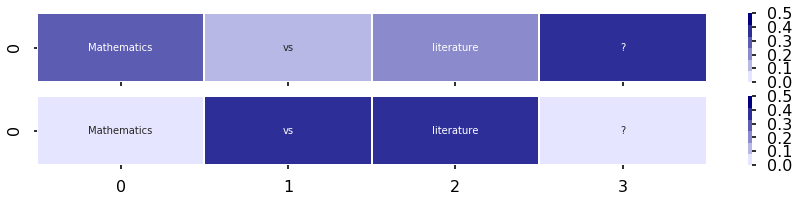

------------------------------
What is <UNK> ?
6


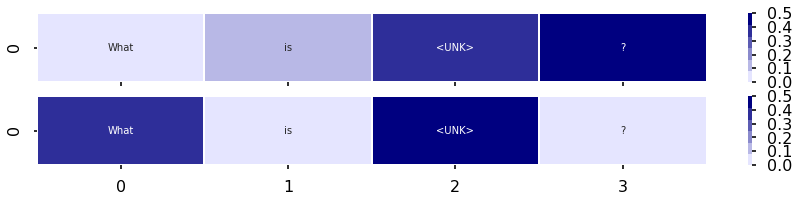

------------------------------
What is macro ?
6


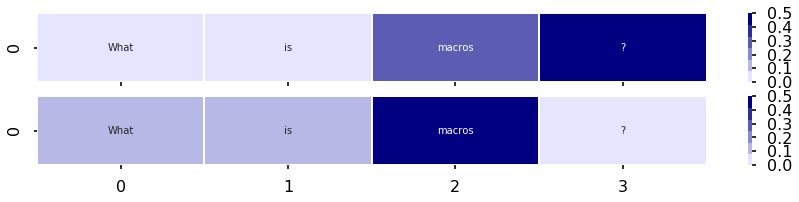

------------------------------
How stool a lot of money ?
6


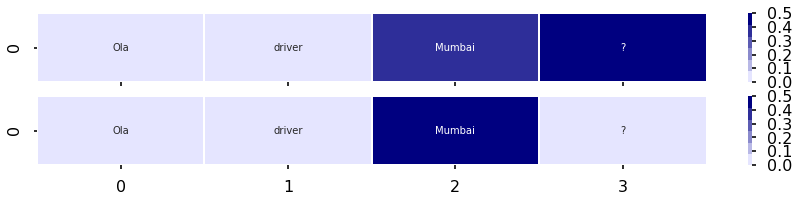

------------------------------
What is plastic memory ?
6


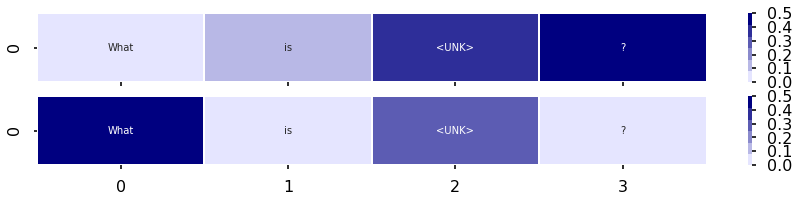

------------------------------
What are the metrics of time ?
6


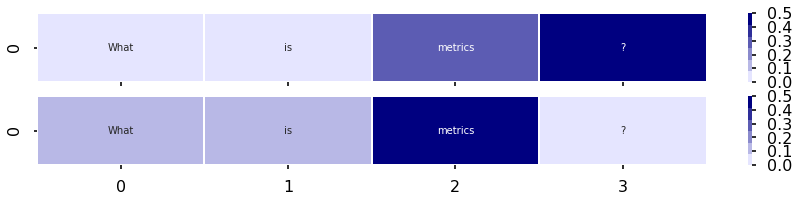

------------------------------
What colour is this ?
6


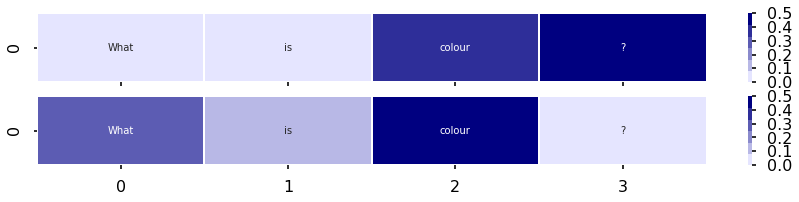

------------------------------
What is flixcart.com ?
6


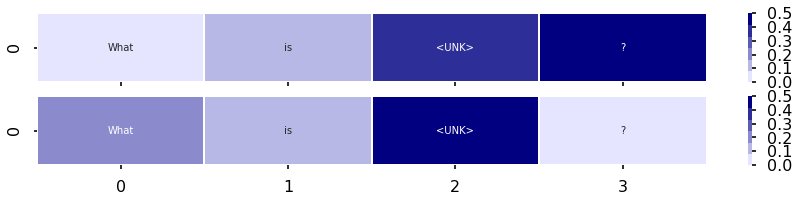

------------------------------
Who owns <UNK> ?
6


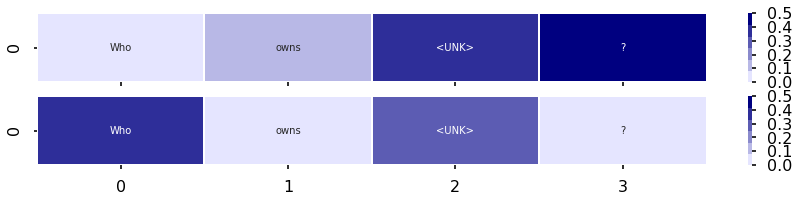

------------------------------
Which would you say is heavier , a pound of cotton or a pound of gold ?
6


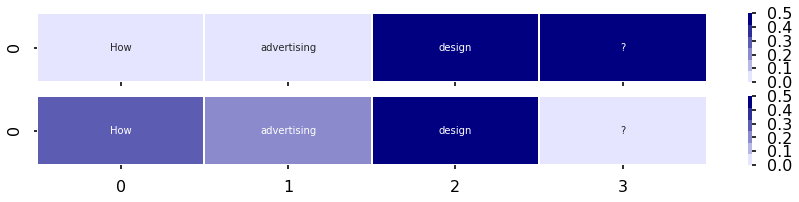

------------------------------
What is <UNK> ?
6


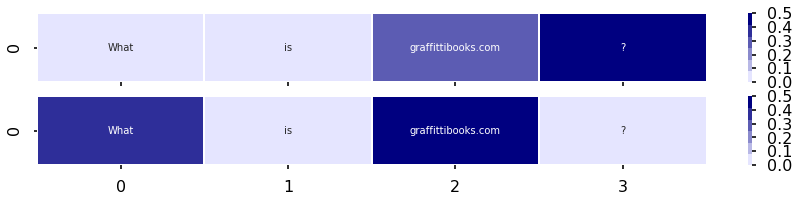

------------------------------
Are you married or not ?
6


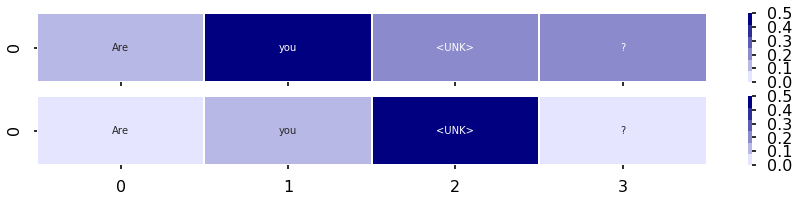

------------------------------
Is there a limit to how much knowledge one can have ?
6


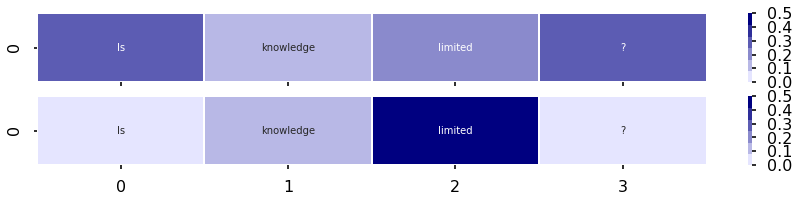

------------------------------
What are some conservative strategy ?
6


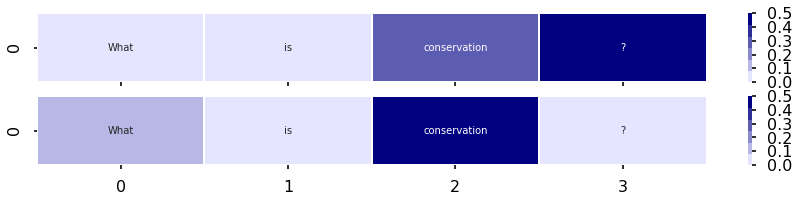

------------------------------
What causes friction ?
6


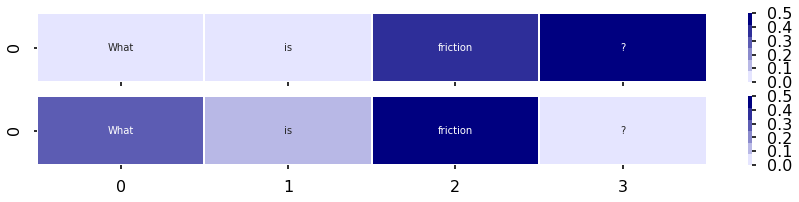

------------------------------
Is <UNK> criminal insanity ?
6


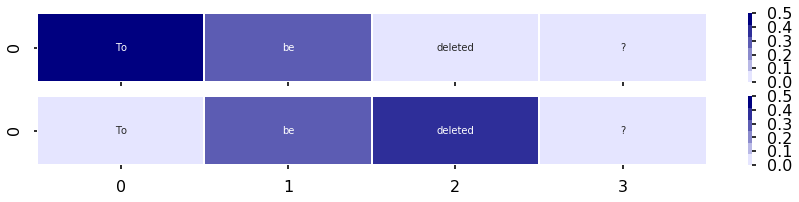

------------------------------
What is <UNK> ?
6


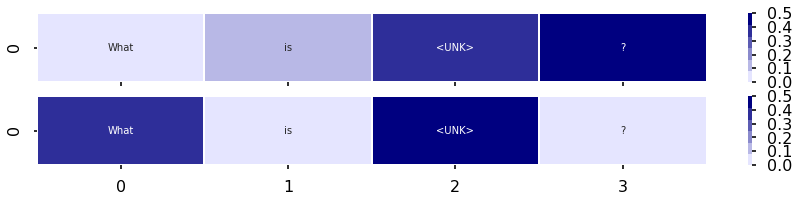

------------------------------
Who invented the bicycle ?
6


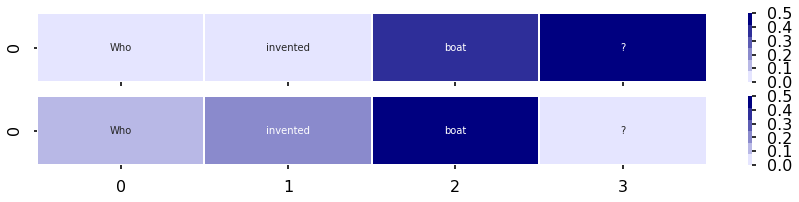

------------------------------
What are liberal <UNK> ?
6


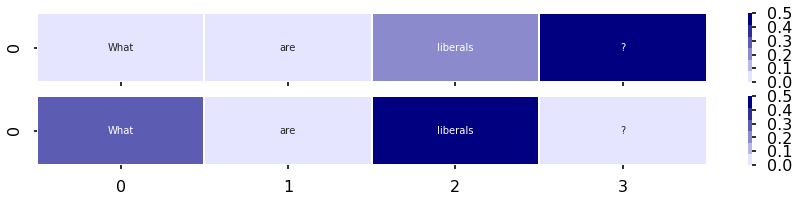

------------------------------
Who created <UNK> ?
6


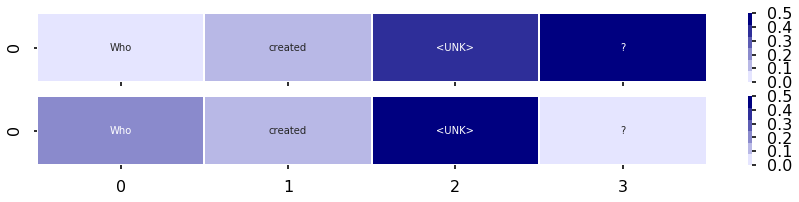

------------------------------
What is osell.com ?
6


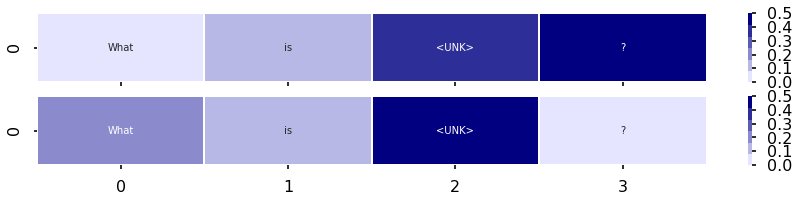

------------------------------
What are all the causes of smog in China ?
6


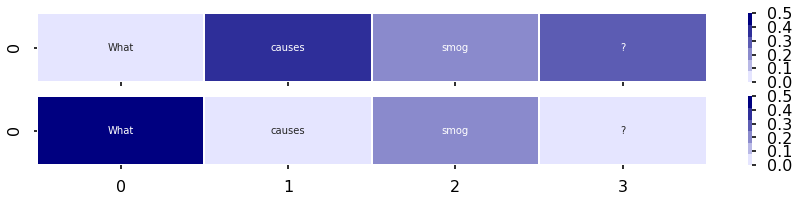

------------------------------
How can I find out whether I 'm overweight ?
6


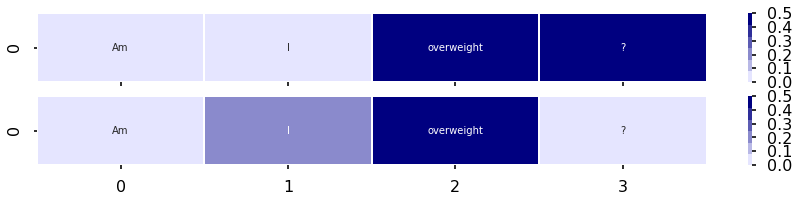

------------------------------
What is chemical <UNK> ?
6


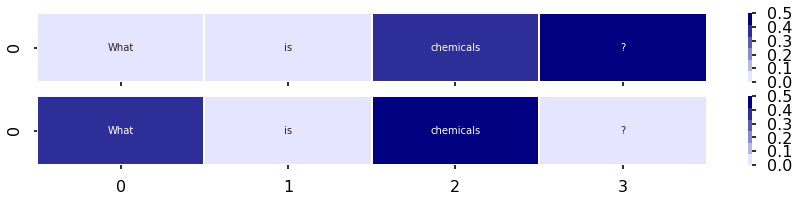

------------------------------
Centre of mass of uniform disc ?
6


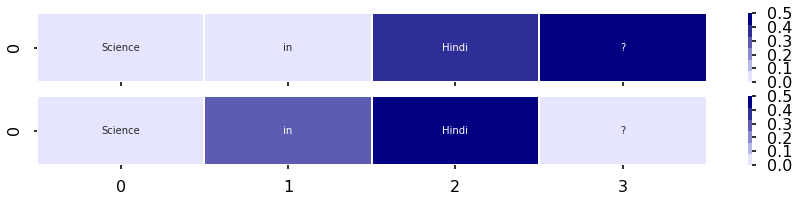

------------------------------
What is dynamic view ?
6


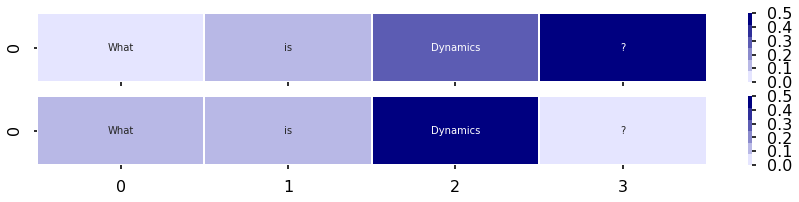

------------------------------
What is pen c ?
6


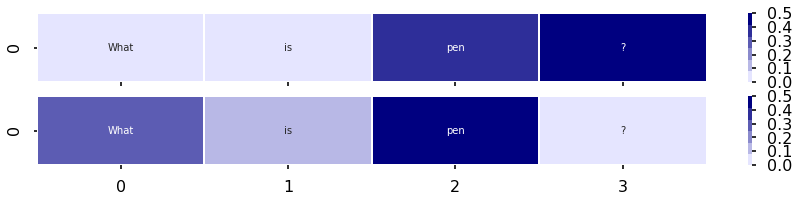

------------------------------
What is training ?
6


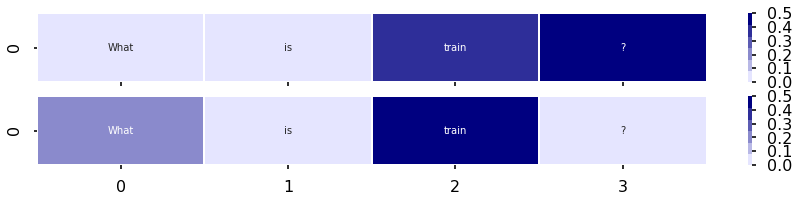

------------------------------
What is <UNK> ?
6


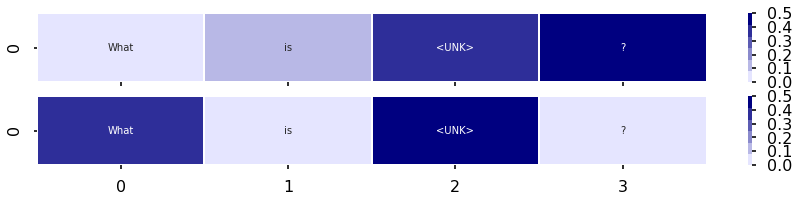

------------------------------
Is war porn immoral ?
6


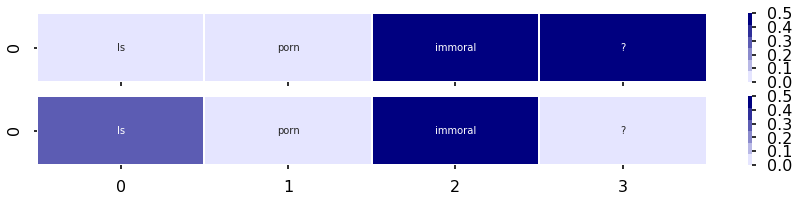

------------------------------
Who own <UNK> ?
6


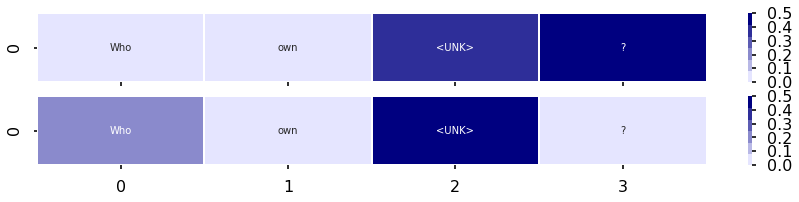

------------------------------
What is <UNK> ?
6


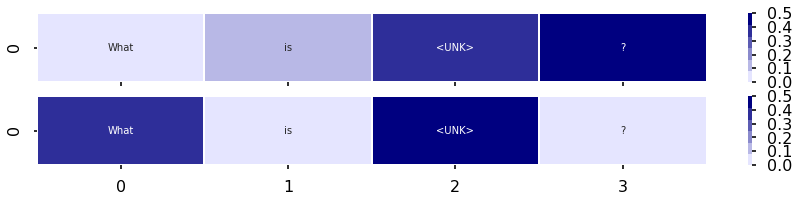

------------------------------
Is there a cure for cancer ?
6


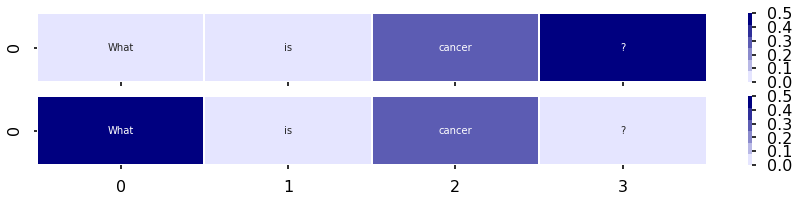

------------------------------
What is your sexual time ?
6


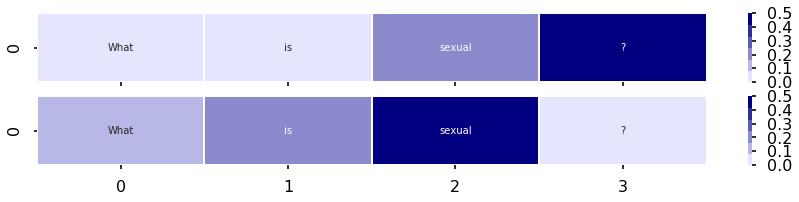

------------------------------
What is the court of God ?
6


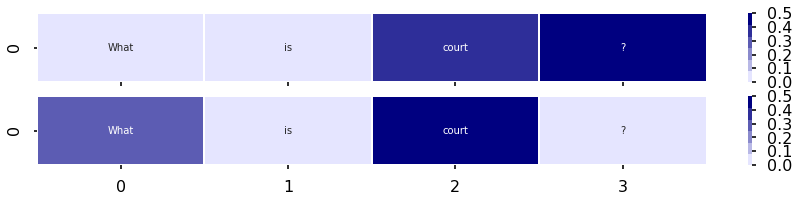

------------------------------
How does Canada have so many Indians ?
6


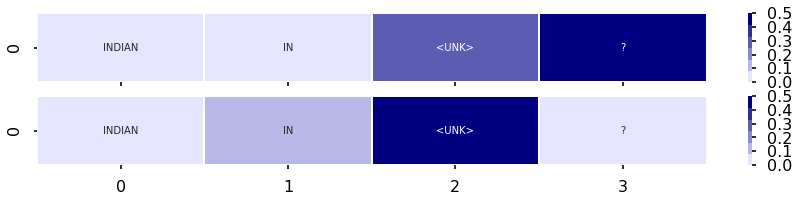

------------------------------
What is <UNK> ?
6


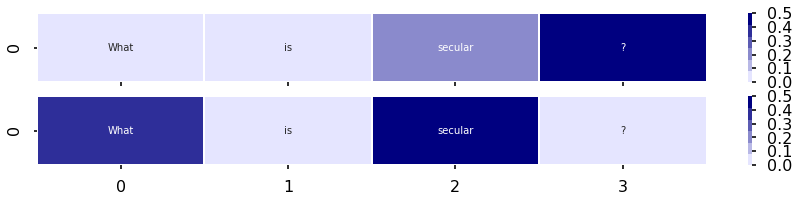

------------------------------
Any one whom I can date ?
6


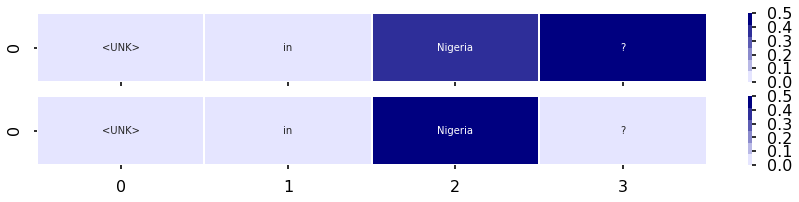

------------------------------
What is <UNK> ?
6


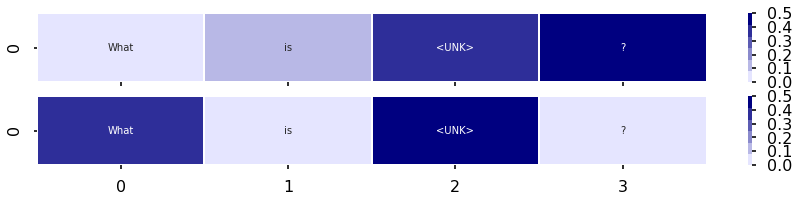

------------------------------
What is fabric made of ?
6


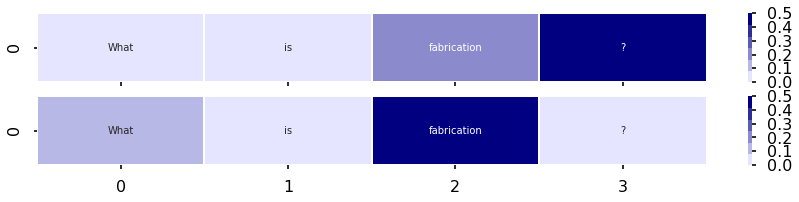

------------------------------
What is <UNK> sciences ?
6


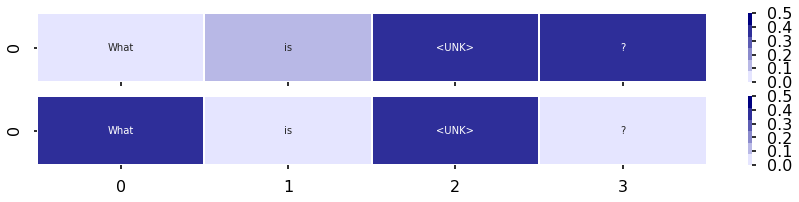

------------------------------
Are you sure God exists ?
6


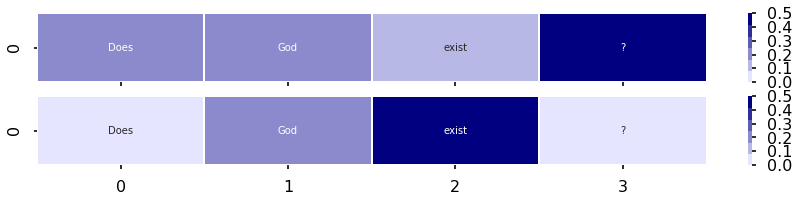

------------------------------
What is a bearing ?
6


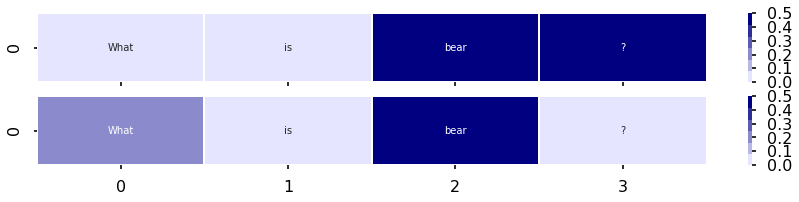

------------------------------
Why are engineers so <UNK> ?
6


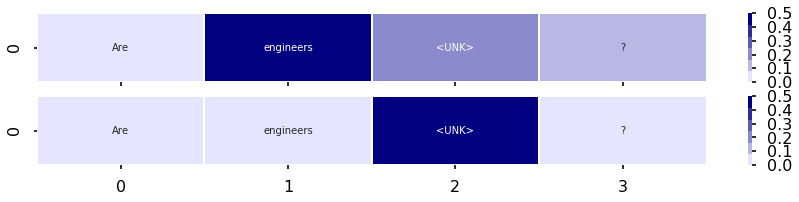

------------------------------
What are some must read non-fiction books ?
6


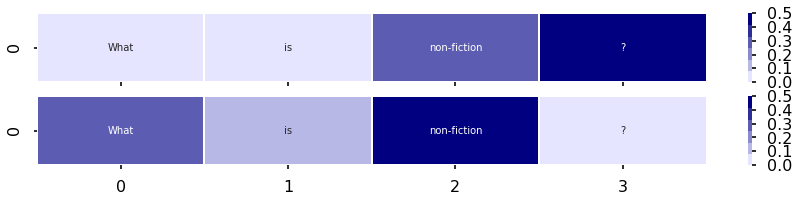

------------------------------
What is the reality of success ?
6


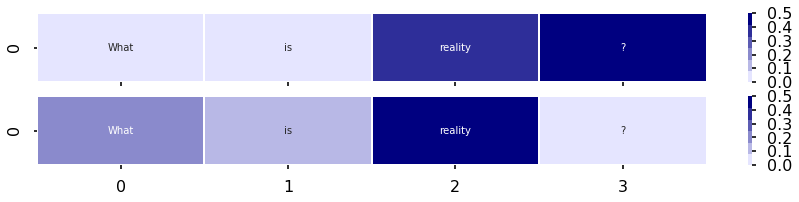

------------------------------
What is entropy in Linux ?
6


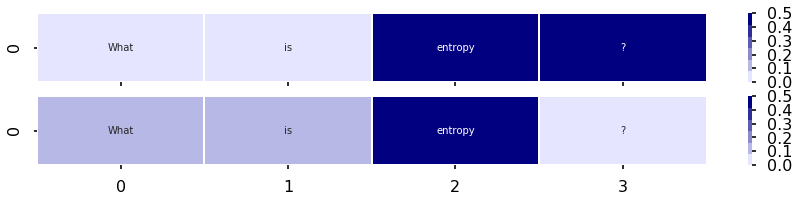

------------------------------
`` What do you think is `` '' Hell '' '' ? ''
6


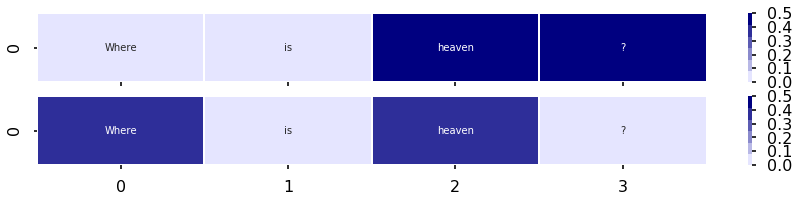

------------------------------
What is <UNK> ?
6


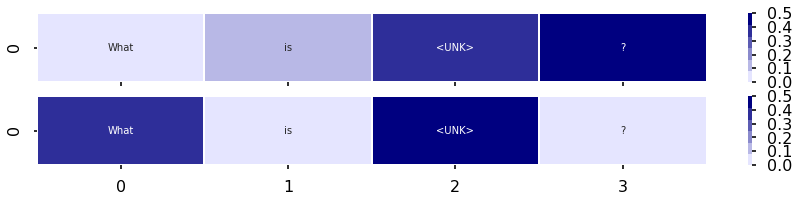

------------------------------
What is consultancy company ? ? ?
6


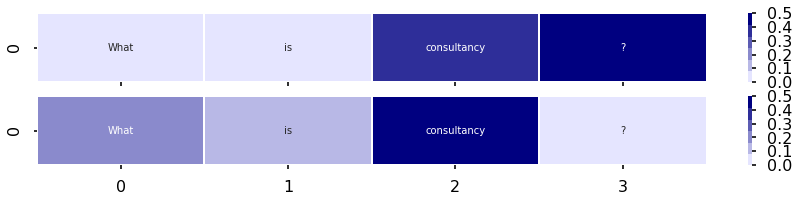

------------------------------
What is <UNK> coal ?
6


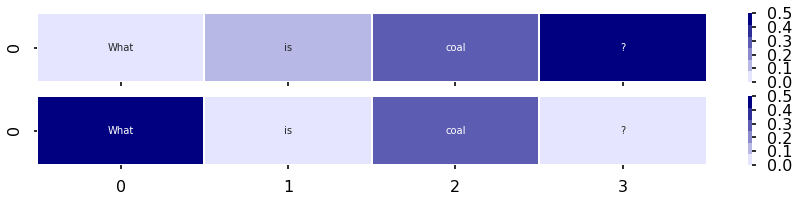

------------------------------
What is shell gas ?
6


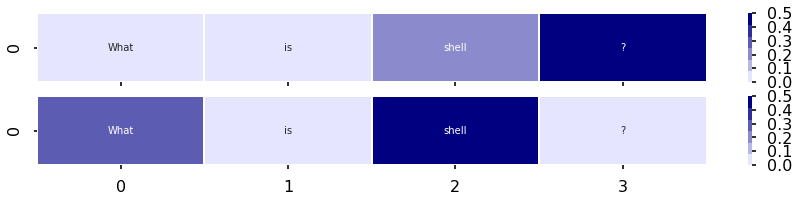

------------------------------
What is <UNK> ?
6


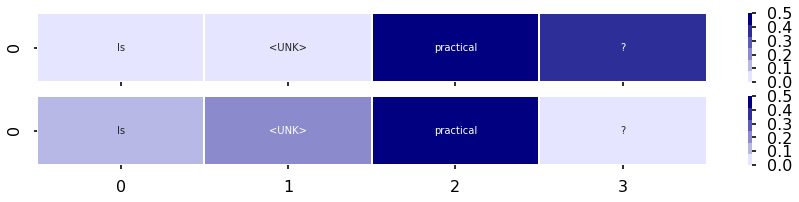

------------------------------
Is trade done in socialism ?
6


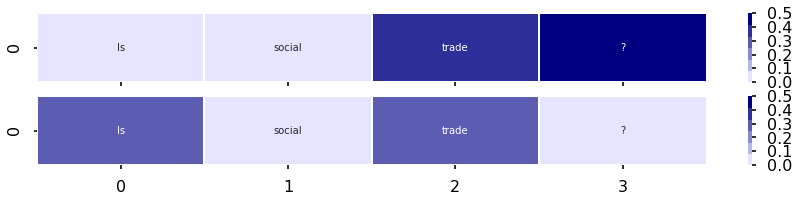

------------------------------
What is bookmarking ?
6


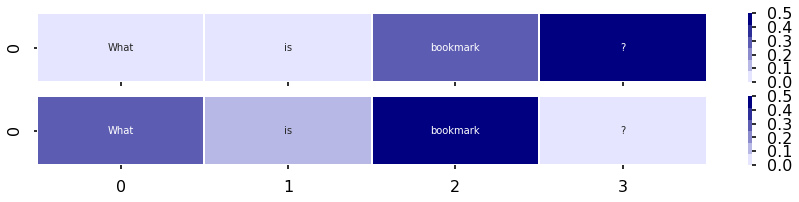

------------------------------
What are you obsessed with these days ?
6


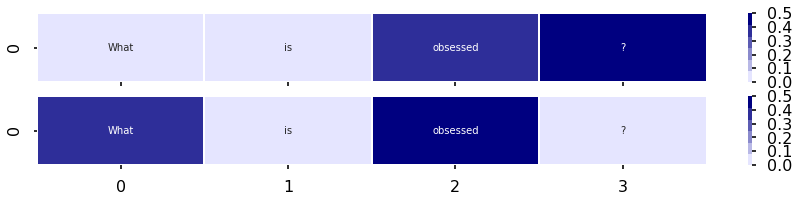

------------------------------
What is labour business ?
6


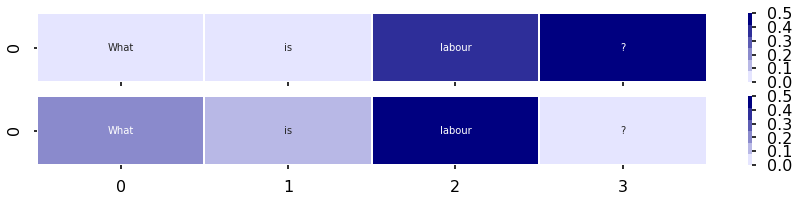

------------------------------
What is asphalt concrete ?
6


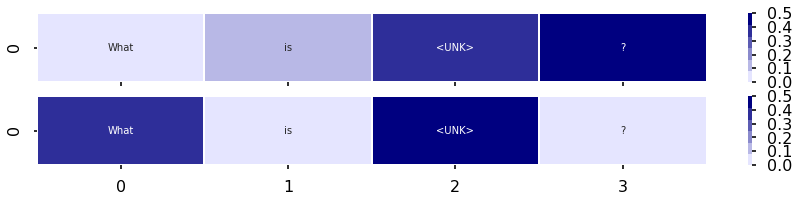

------------------------------
What is Toastmasters like ?
6


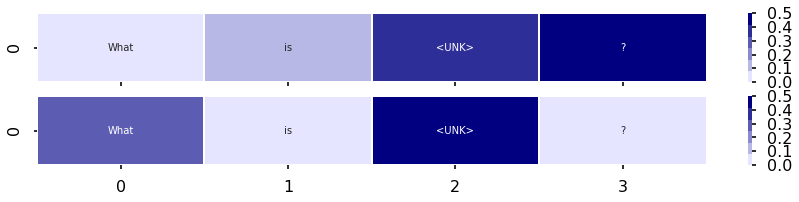

------------------------------
What is the cognitive turn ?
6


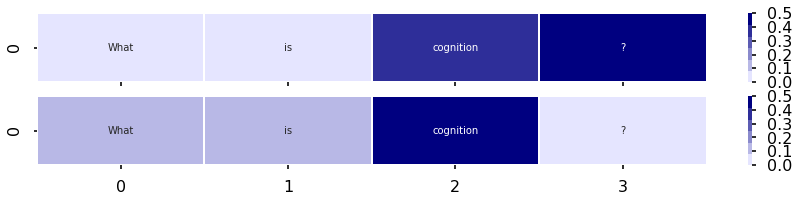

------------------------------
What is a <UNK> model ?
6


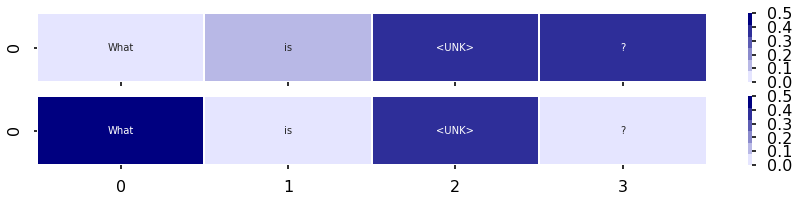

------------------------------
What is <UNK> ?
6


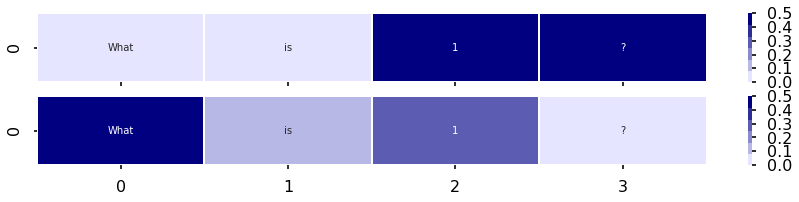

------------------------------
What is <UNK> ?
6


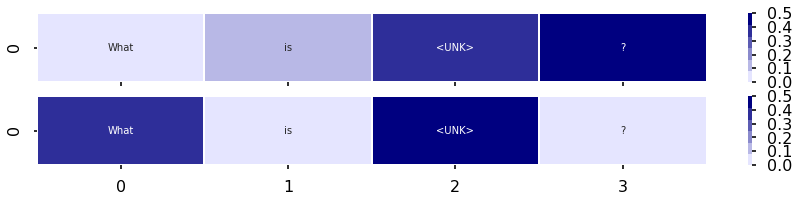

------------------------------
What is <UNK> ?
6


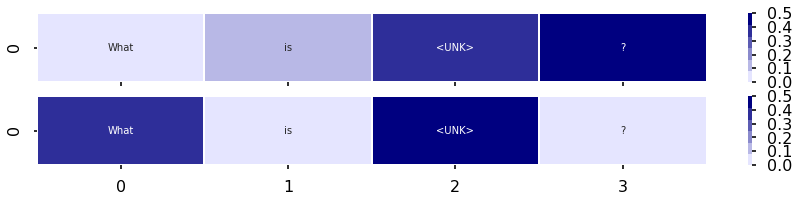

------------------------------
What is <UNK> ?
6


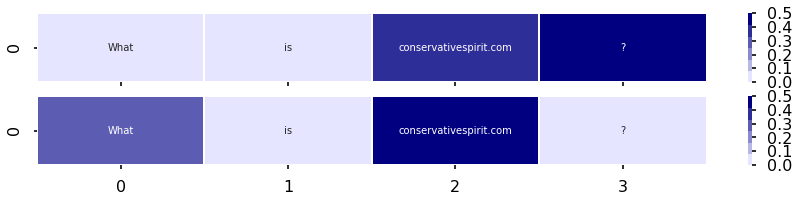

------------------------------
Why does n't time stop ?
6


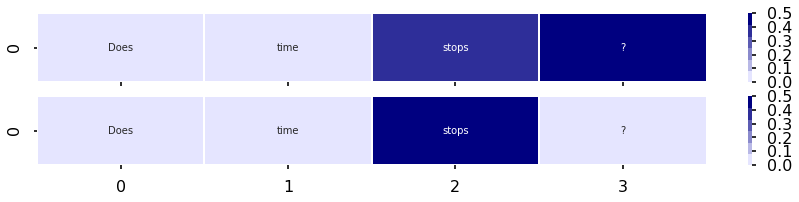

------------------------------
What is a way to get girls on Omegle ?
6


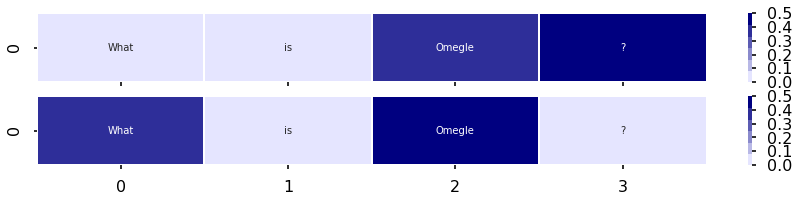

------------------------------
What is the vision for your life ?
6


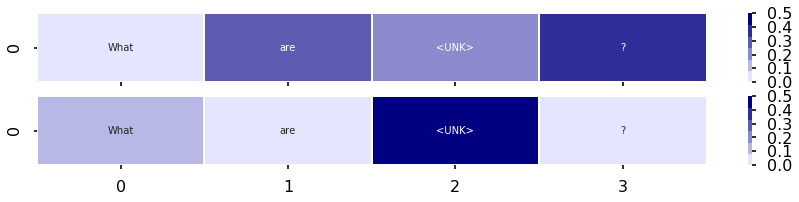

------------------------------
What was Waze developed in ?
6


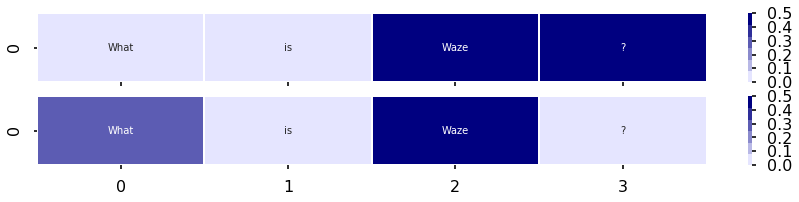

------------------------------
How do you cut ( bodybuilding ) ?
6


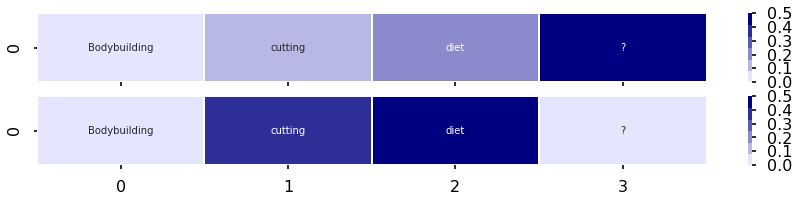

------------------------------
How do I calculate CGPA ?
6


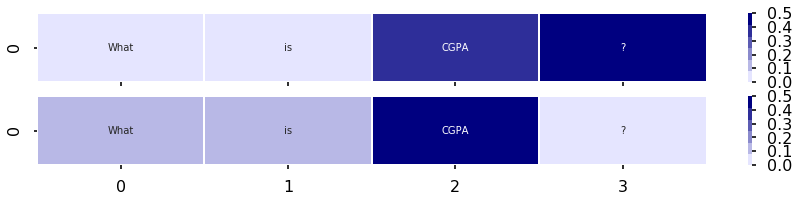

------------------------------
How can I find my passion ?
6


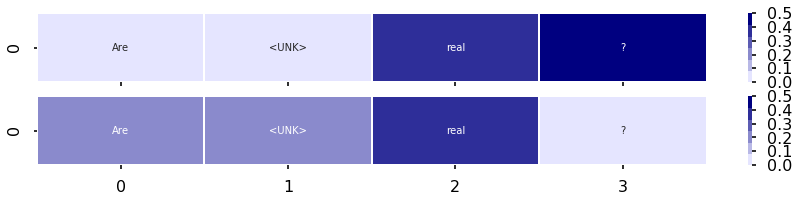

------------------------------
I want to learn ecology , where should I start ?
6


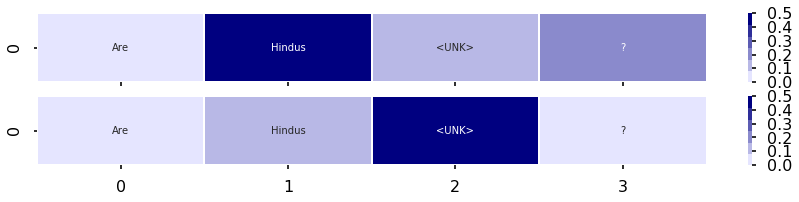

------------------------------
What is coffee <UNK> ?
6


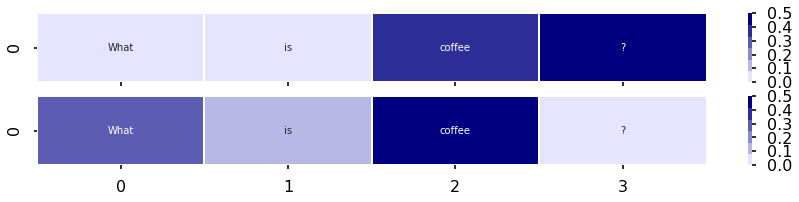

------------------------------
What is chemistry ?
7


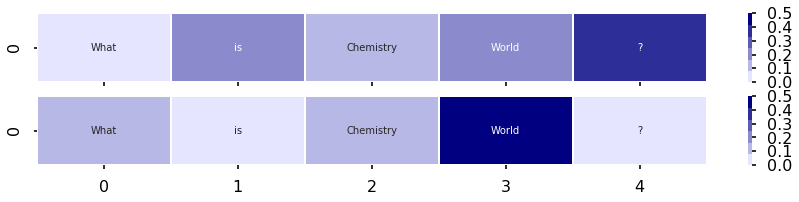

------------------------------
Does God exist ?
7


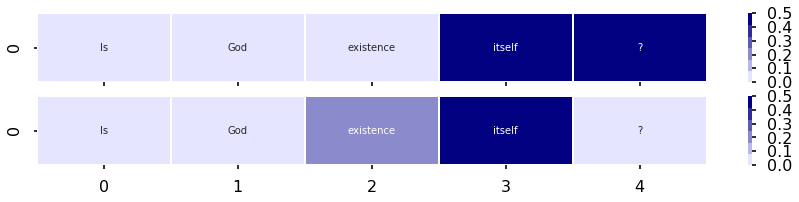

------------------------------
Who is the artist that painted this ?
7


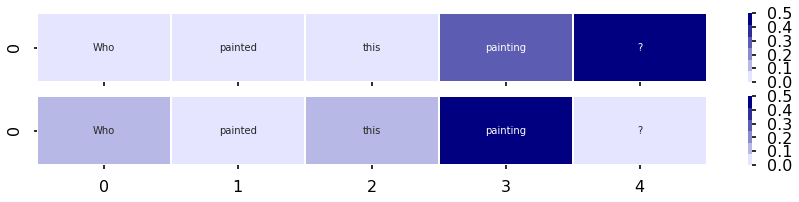

------------------------------
Why do people vote ?
7


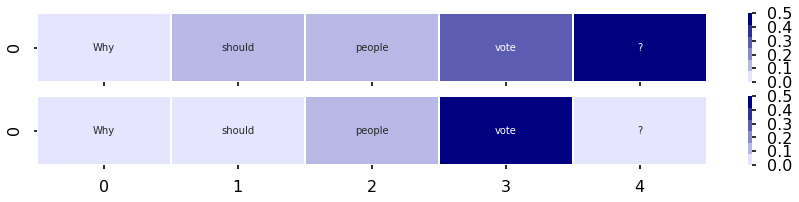

------------------------------
Do animals believe in God ?
7


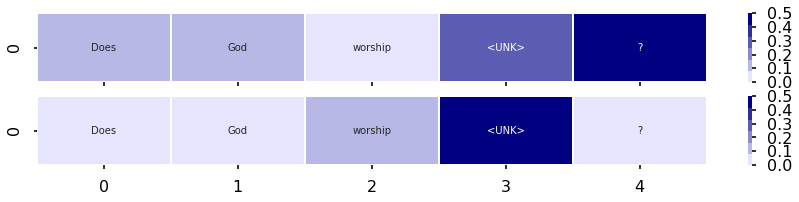

------------------------------
How do I tune my ukulele ?
7


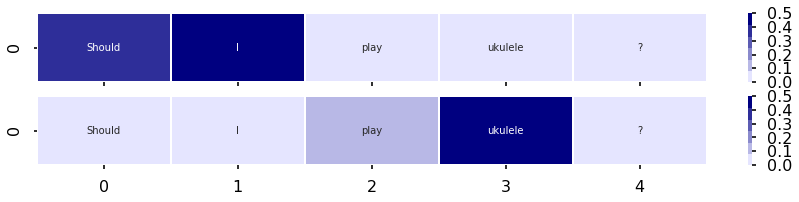

------------------------------
How is light a form of energy ?
7


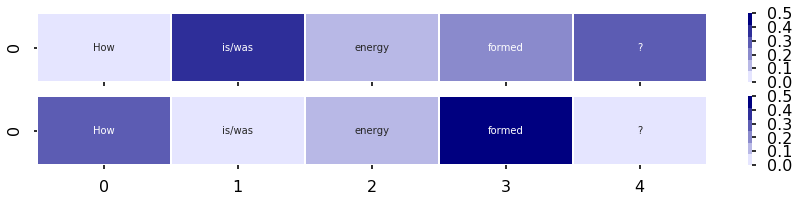

------------------------------
Is masturbating good for health ?
7


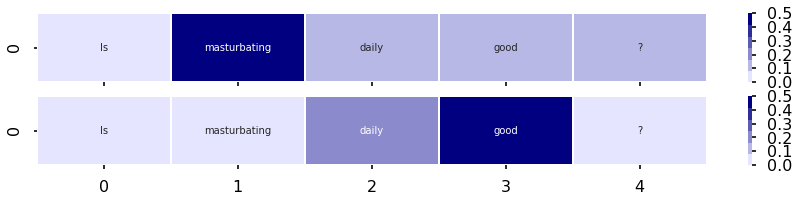

------------------------------
Can you be a good computer scientist even if math does n't come naturally to you ?
7


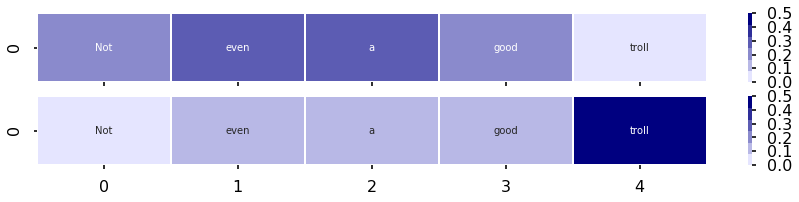

------------------------------
How is kinetic energy measured ?
7


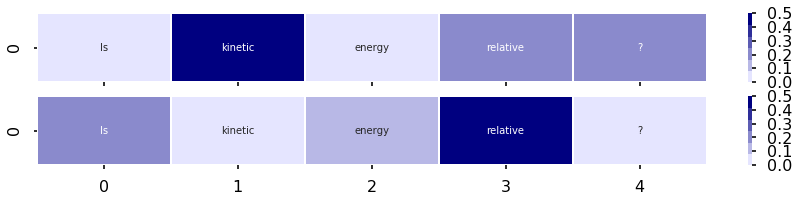

------------------------------
How legit is <UNK> ?
7


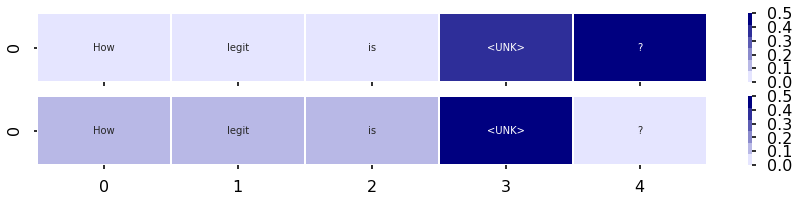

------------------------------
What is the aim of science ?
7


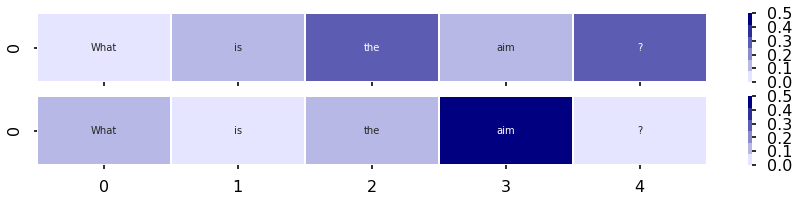

------------------------------
What is <UNK> collections ?
7


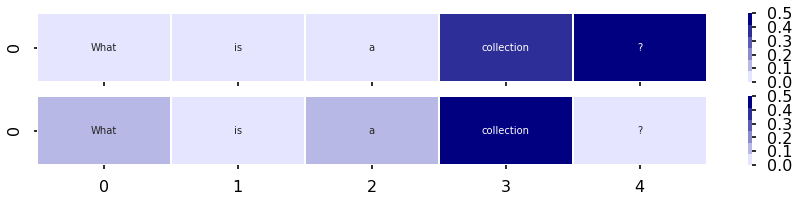

------------------------------
What is a residential lease ?
7


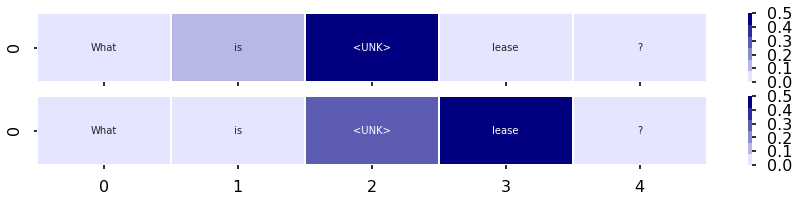

------------------------------
What is the product portfolio of Amazon ?
7


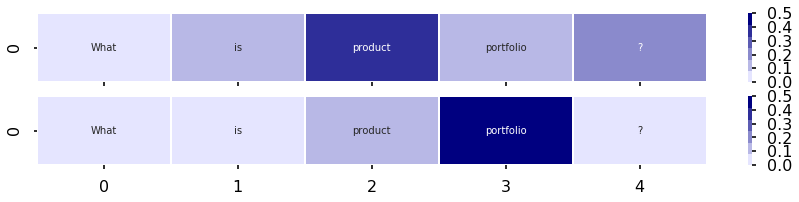

------------------------------
<UNK> HTML5 canvas ?
7


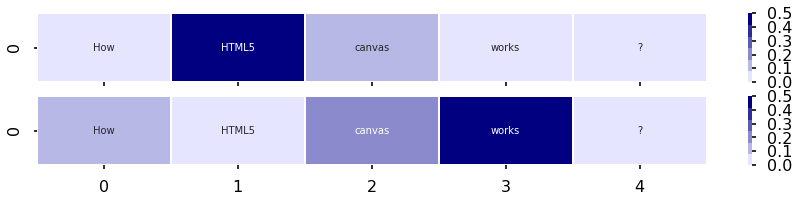

------------------------------
Is BJP corrupt ?
7


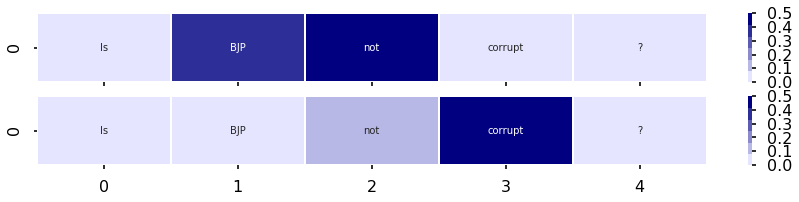

------------------------------
What can a multimedia computer do ?
7


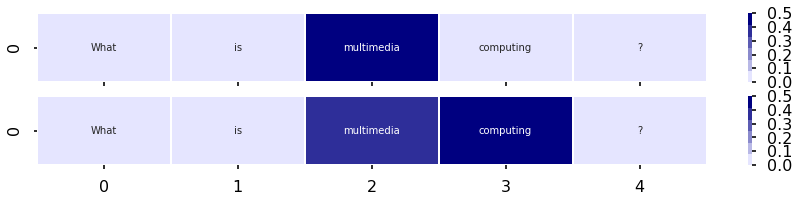

------------------------------
What is a conservative ?
7


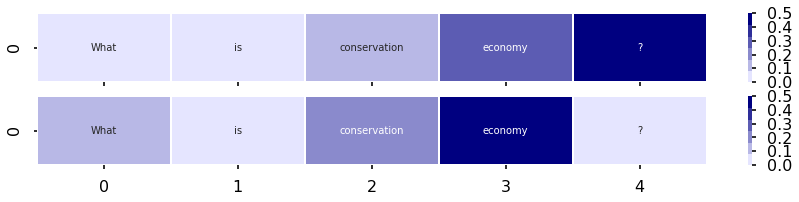

------------------------------
What does religious freedom look like in Japan ?
7


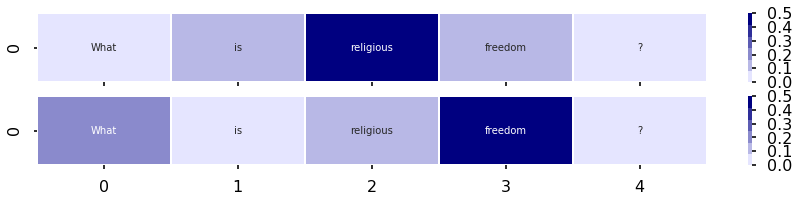

------------------------------
What is Mobile GIS ?
7


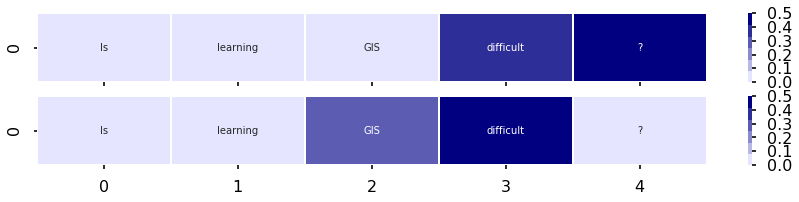

------------------------------
What is mathematical proof ?
7


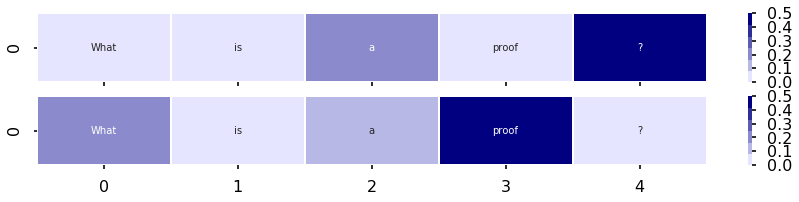

------------------------------
What is Vitamin B ?
7


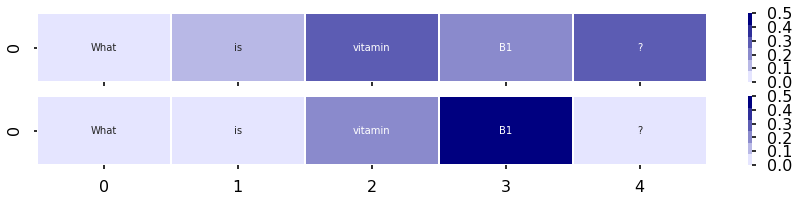

------------------------------
How do I share GIFs on Instagram ?
7


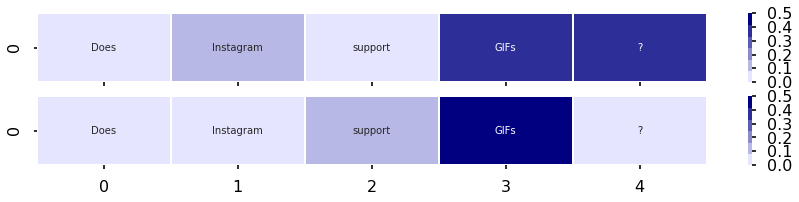

------------------------------
What is an advertisement ?
7


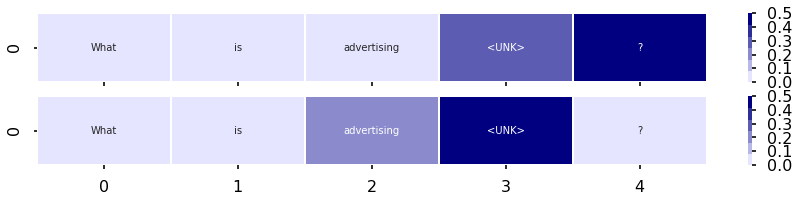

------------------------------
How much <UNK> health insurance is necessary ?
7


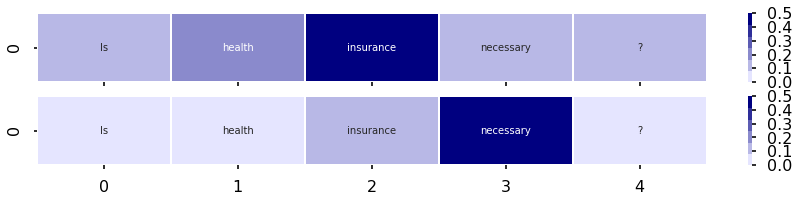

------------------------------
Is iron a natural resource or a human made resource ?
7


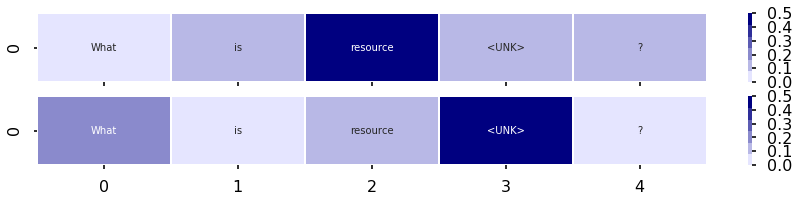

------------------------------
What is spectrum ?
7


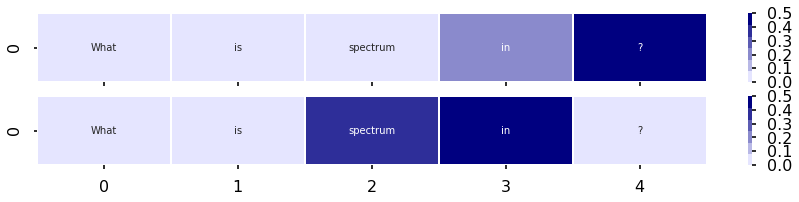

------------------------------
What is the thing you may not know about dogs ?
7


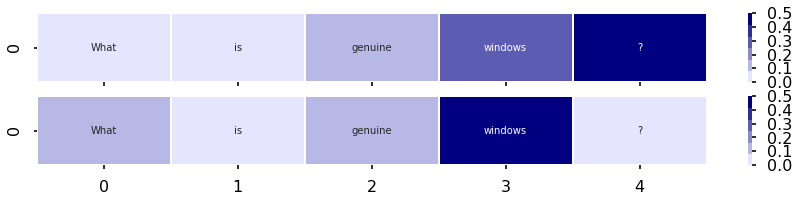

------------------------------
How can I hack someone 's WhatsApp account if I just have his WhatsApp account number ?
7


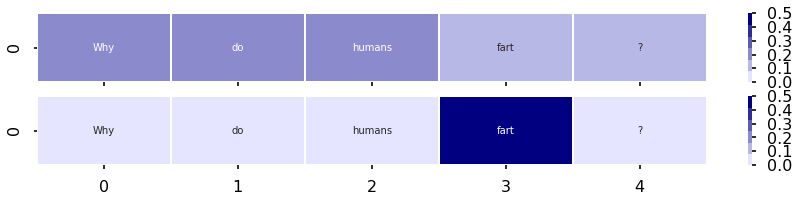

------------------------------
What happened to <UNK> ?
7


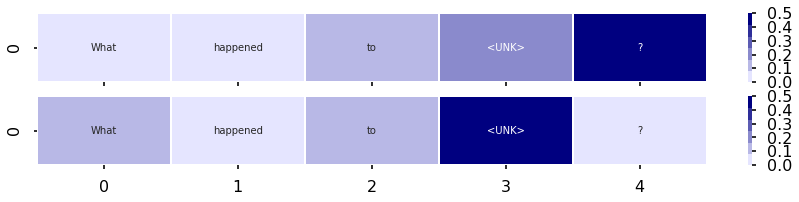

------------------------------
What are some ways to get the number of the girl I love ?
7


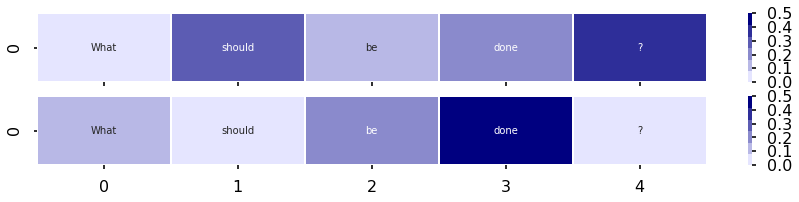

------------------------------
How can I ask a girl for her number ?
7


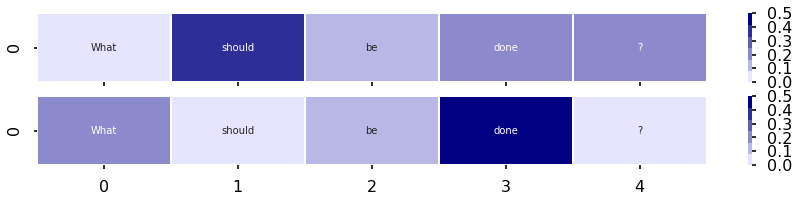

------------------------------
Does Google hire physicists ?
7


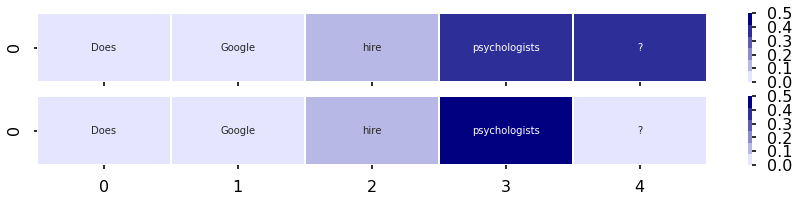

------------------------------
Will this be considered as plagiarism ?
7


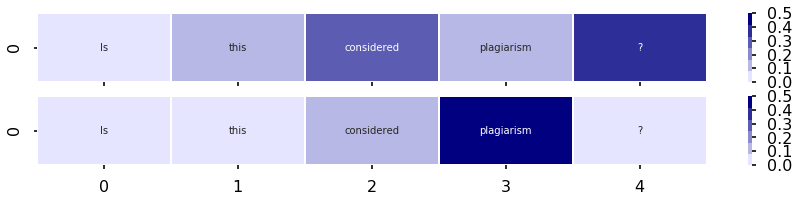

------------------------------
What are the most important questions ?
7


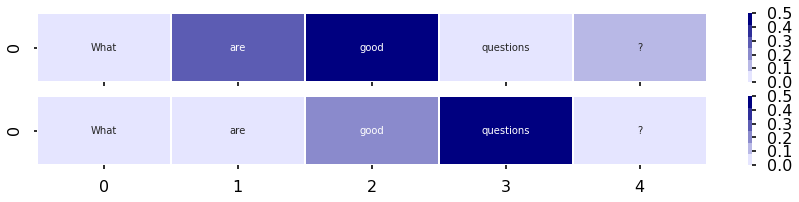

------------------------------
Why are we humans ?
7


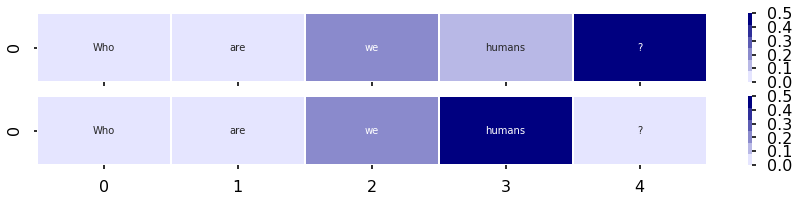

------------------------------
What is asphalt ?
7


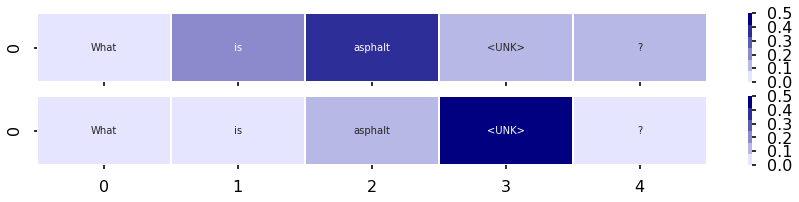

------------------------------
What rhymes with books ?
7


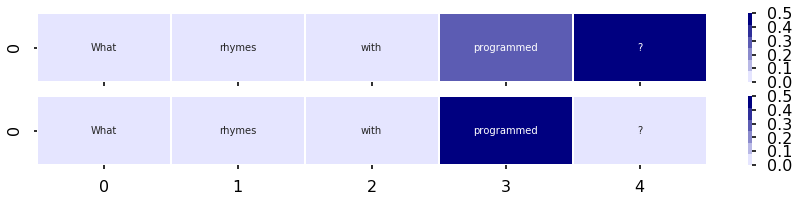

------------------------------
What is ethical dimension ?
7


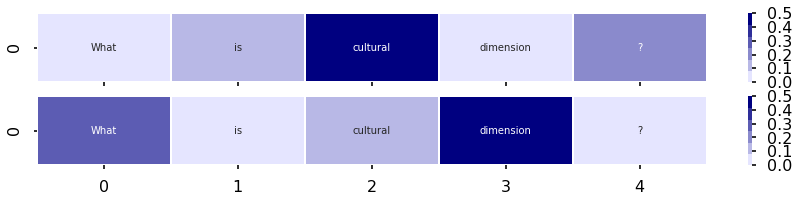

------------------------------
What is the best way to cook a ham ?
7


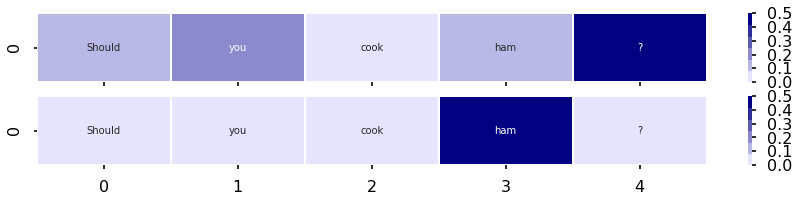

------------------------------
What does SQLite do ?
7


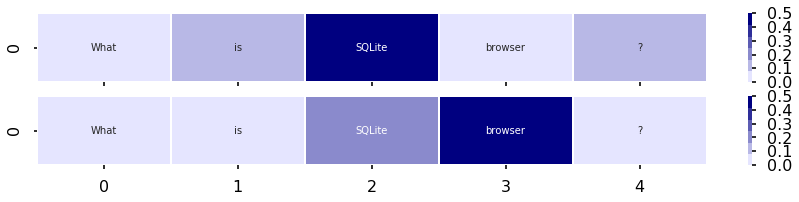

------------------------------
What is forum commenting ?
7


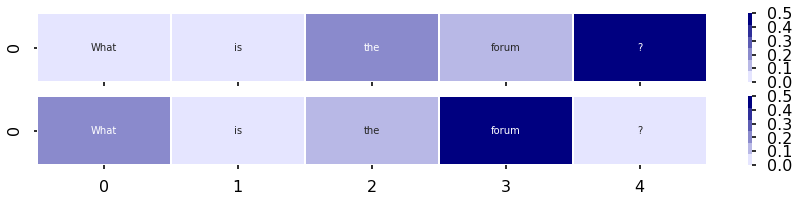

------------------------------
If you could regenerate health ( like video games ) how would this change war in real life ?
7


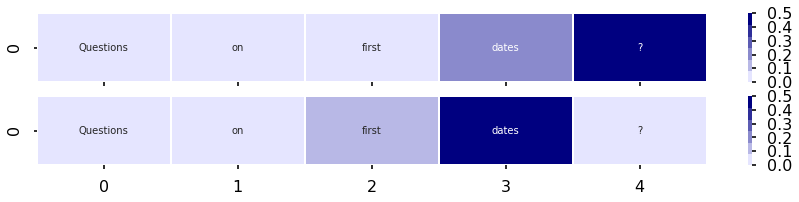

------------------------------
What is happiness ?
7


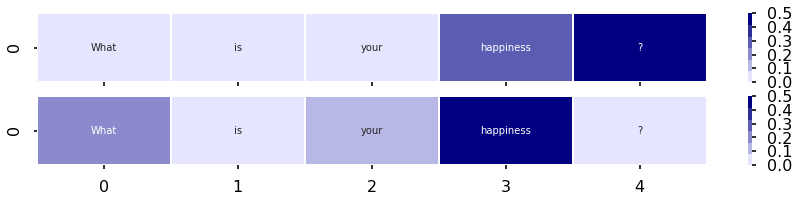

------------------------------
What 's the difference between 4G and 4G LTE ?
7


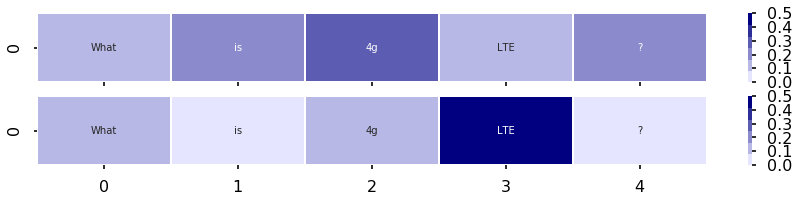

------------------------------
What happened to Filepile.com ?
7


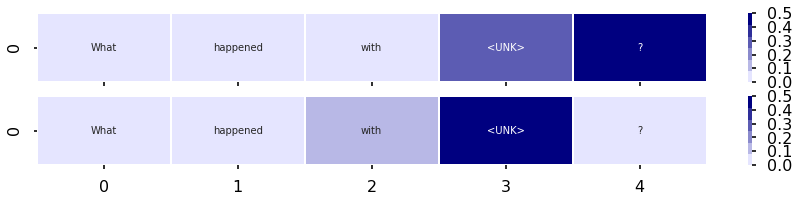

------------------------------
Does the multiverse have a multiverse ?
7


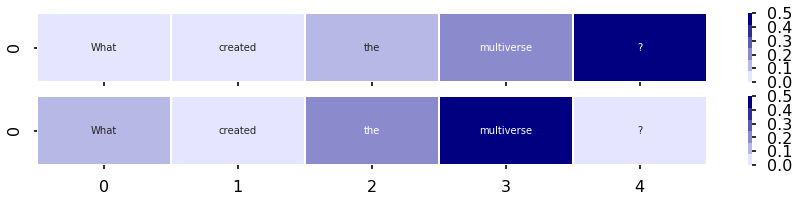

------------------------------
What are the <UNK> ?
7


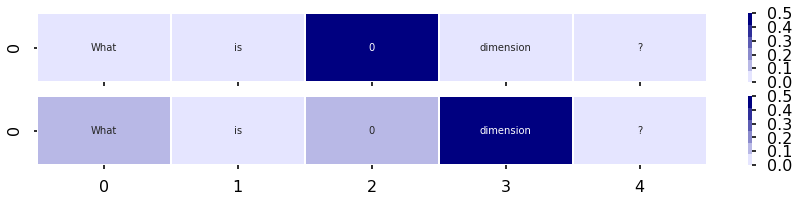

------------------------------
What is AutoCAD ?
7


In [ ]:
count = print_attention(output1,output2, output3, max=250, plot=True, output_filter=0, jsd_thresh=0.21)
print(count)